In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pylab 
import scipy.stats as stats

In [2]:
path = r"C:\Users\patri\OneDrive\Desktop\rossmann-store-sales\Data"
train = pd.read_csv(path + r"\train.csv")
test = pd.read_csv(path + r"\test.csv")
store = pd.read_csv(path + r"\store.csv")

C:\Users\patri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(train.shape)
print(test.shape)
print(store.shape)

(1017209, 9)
(41088, 8)
(1115, 10)


In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
#1115 unique stores
len(train["Store"].unique())

1115

In [8]:
train["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [9]:
train.groupby("DayOfWeek")["Sales"].mean()

DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64

In [10]:
test["DayOfWeek"].unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [11]:
#I wanted to check this in case they somehow counted online orders from a store but this is going to be an important variable
#for predicting sales
train[(train["Open"] == 0) & (train["Sales"] != 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [12]:
#Plotting average sales during holidays
train.loc[train["StateHoliday"]==1, "Sales"]

Series([], Name: Sales, dtype: int64)

In [13]:
#I think one is a string and the other a number so we need to fix this
train["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [14]:
#Only has 1 type of holiday in testing
test["StateHoliday"].value_counts()

0    40908
a      180
Name: StateHoliday, dtype: int64

In [15]:
#0 is no holiday
#1 is a (public holiday)
#2 is b (easter holiday)
#3 is c (x-mas holiday)

#Warning because b and c don't exist but thats fine
train.loc[train["StateHoliday"] == "0", "StateHoliday"] = 0
train.loc[train["StateHoliday"] == "a", "StateHoliday"] = 1
train.loc[train["StateHoliday"] == "b", "StateHoliday"] = 2
train.loc[train["StateHoliday"] == "c", "StateHoliday"] = 3

test.loc[test["StateHoliday"] == "0", "StateHoliday"] = 0
test.loc[test["StateHoliday"] == "a", "StateHoliday"] = 1
test.loc[test["StateHoliday"] == "b", "StateHoliday"] = 2
test.loc[test["StateHoliday"] == "c", "StateHoliday"] = 3

C:\Users\patri\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [16]:
train["Date"].dtypes

dtype('O')

In [17]:
train["Date"] = pd.to_datetime(train["Date"])
train["Date"].dtypes

dtype('<M8[ns]')

In [18]:
train = train.set_index("Date")

C:\Users\patri\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


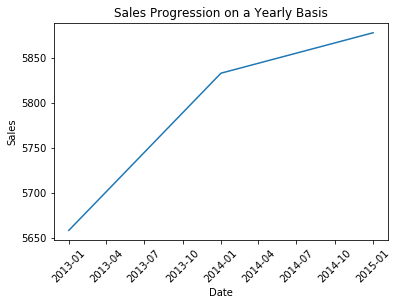

In [19]:
#We can see there is a steady annual increase in sales
timedf = train.resample("AS")["Sales"].mean().reset_index()
g = sns.lineplot(x = "Date", y = "Sales", data = timedf)
g.set_title("Sales Progression on a Yearly Basis")
plt.xticks(rotation=45)
plt.show()

In [20]:
timedf = train.resample("3M")["Sales"].mean().reset_index()
timedf

,Date,Sales
0,2013-01-31,5211.555578
1,2013-04-30,5604.333914
2,2013-07-31,5604.964866
3,2013-10-31,5495.798596
4,2014-01-31,6001.503919
5,2014-04-30,5708.565607
6,2014-07-31,5759.103247
7,2014-10-31,5725.192292
8,2015-01-31,6269.566321
9,2015-04-30,5863.113085


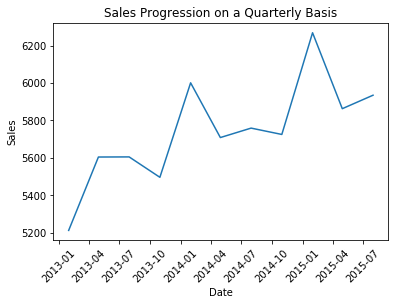

In [21]:
#We can see there is a clear trend line, increasing and spiking at christmas
g = sns.lineplot(x = "Date", y = "Sales", data = timedf)
g.set_title("Sales Progression on a Quarterly Basis")
plt.xticks(rotation=45)
plt.show()

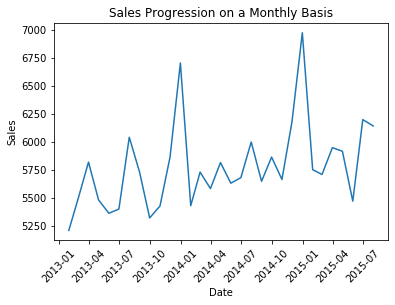

In [22]:
#Monthly it looks a bit more erratic but still clearly spikes up during Holidays
timedf = train.resample("M")["Sales"].mean().reset_index()
g = sns.lineplot(x = "Date", y = "Sales", data = timedf)
g.set_title("Sales Progression on a Monthly Basis")
plt.xticks(rotation=45)
plt.show()

In [23]:
#This counts by Day of The Week including when the store is closed
dayofweekdf = pd.DataFrame(train
                           .groupby("DayOfWeek")[["Customers", "Sales"]]
                           .mean()
                          ).reset_index()
dayofweekdf

,DayOfWeek,Customers,Sales
0,1,813.065791,7809.044510
1,2,760.984615,7005.244467
2,3,721.639666,6555.884138
3,4,697.541486,6247.575913
4,5,743.150742,6723.274305
5,6,657.112237,5847.562599
6,7,35.786817,204.183189


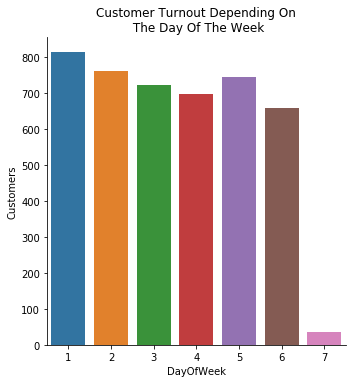

In [24]:
#Most likely because the store is closed on Sundays except for holidays
g = sns.catplot(x="DayOfWeek", y = "Customers", data = dayofweekdf, kind = "bar")
g.axes.flatten()[0].set_title("Customer Turnout Depending On\n The Day Of The Week")
plt.show()

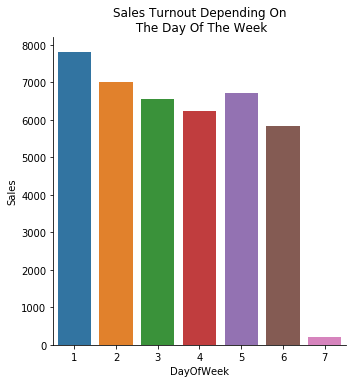

In [25]:
#As expected the store closes often on Sunday, so little customers leads to little Sales turnover.
g = sns.catplot(x="DayOfWeek", y = "Sales", data = dayofweekdf, kind = "bar")
g.axes.flatten()[0].set_title("Sales Turnout Depending On\n The Day Of The Week")
plt.show()

In [26]:
dayofweekopendf = pd.DataFrame(train[train["Open"] == 1]
                           .groupby("DayOfWeek")[["Customers", "Sales"]]
                           .mean()
                          ).reset_index()
dayofweekopendf

,DayOfWeek,Customers,Sales
0,1,855.444984,8216.073074
1,2,769.986753,7088.113656
2,3,740.598876,6728.122978
3,4,755.569784,6767.310159
4,5,781.771639,7072.677012
5,6,660.177526,5874.840238
6,7,1441.532424,8224.723908


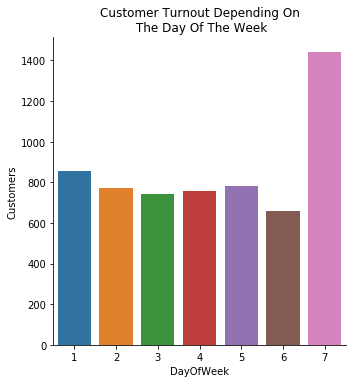

In [27]:
#Now this makes more sense, on Sundays, when the store is open it is going to be packed
g = sns.catplot(x="DayOfWeek", y = "Customers", data = dayofweekopendf, kind = "bar")
g.axes.flatten()[0].set_title("Customer Turnout Depending On\n The Day Of The Week")
plt.show()

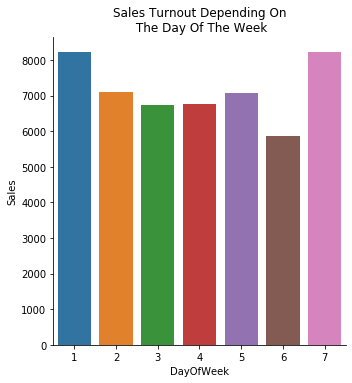

In [28]:
#Interesting to see that while the customer turnout is massive the sales turnout when the store is open is not as significant
#as I might have expected it to be.
g = sns.catplot(x="DayOfWeek", y = "Sales", data = dayofweekopendf, kind = "bar")
g.axes.flatten()[0].set_title("Sales Turnout Depending On\n The Day Of The Week")
plt.show()

In [29]:
#We try to now filter out holidays to see how it affects customer and sale turnout on days of the week
dayofweekholidaydf = pd.DataFrame(train[((train["StateHoliday"] != 0) |
                                        (train["SchoolHoliday"] != 0)) &
                                       (train["Open"] == 1)]
                                  .groupby("DayOfWeek")[["Customers", "Sales"]]
                                  .mean()
                                 ).reset_index()
dayofweekholidaydf

,DayOfWeek,Customers,Sales
0,1,896.176664,8690.575278
1,2,769.296074,7100.849889
2,3,730.159878,6662.937834
3,4,770.046998,6861.940051
4,5,770.998681,6852.746317
5,6,663.052844,5951.112661
6,7,2220.583333,12082.869048


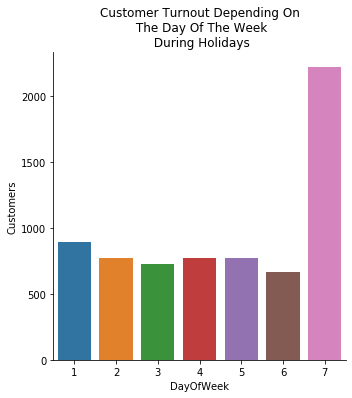

In [30]:
#During holidays we get even more customers on Sundays compared to other days
g = sns.catplot(x="DayOfWeek", y = "Customers", data = dayofweekholidaydf, kind = "bar")
g.axes.flatten()[0].set_title("Customer Turnout Depending On\n The Day Of The Week\n During Holidays")
plt.show()

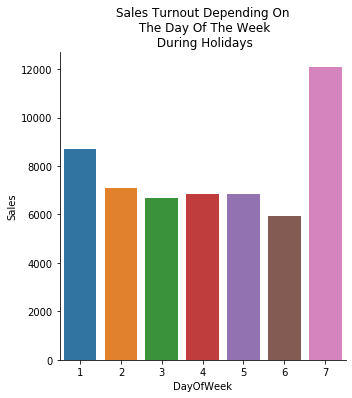

In [31]:
g = sns.catplot(x="DayOfWeek", y = "Sales", data = dayofweekholidaydf, kind = "bar")
g.axes.flatten()[0].set_title("Sales Turnout Depending On\n The Day Of The Week\n During Holidays")
plt.show()

### Why would we have a higher Sales to Customer Ratio on everyday but Sunday?

My reasoning is that it is more likely that people on Sunday just go to the store to see what there is without any intention to buy as they have a lot of free time. However, during the weekday, the average person's free time is limited and if they are going to the store it is with a purpose.

In [32]:
#Now to see the effect of Promo on sales
promodf = train.loc[train["Open"] == 1,:].groupby("Promo")[["Sales","Customers"]].mean()
promodf

,Sales,Customers
Promo,,
0,5929.407603,696.856886
1,8228.281239,844.434401


In [33]:
#Now we can see that the difference in Sales is about 2000, but we would need to run a proper Interrupted Series Analysis
#to understand the impact of promotions on Sales, if we plan on using the same data. For time constraints I'll move on and
#get to the prediction part.

In [34]:
#Prepping my data for cross validation
#We remove customers too because its not data we will have on a given day
X = train.drop(columns = ["Sales","Customers"])
y = train.loc[:,"Sales"]
cv_trainX, cv_testX, cv_trainy, cv_testy = train_test_split(X, y, test_size = 0.3)

In [35]:
#I decided to go with a Random Forest model
model = RandomForestRegressor(n_estimators = 100, max_depth = 30)
model.fit(cv_trainX, cv_trainy)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
#89% is pretty solid for a first try
#How I would improve it would be GridSearch for hyperparameter optimization. Joining with the store table in order to get more
#predictors and possibly create more predictors like day, month, year. Could also run other models like xgboost, LSTM
model.score(cv_testX, cv_testy)

0.8905449689911837

In [37]:
#All the NaN on open are not given. We're going to assume its open for two reasons. Promo is still going on for a few of them
#We're also going to get a massive penalty if we assume 0 sales when there actually were sales. Furthermore no days of the week
#were on Sunday or on a Holiday so no reason to assume its Closed.
test[test.isnull().any(axis=1)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [38]:
test.loc[test.isnull().any(axis=1), "Open"] = 1

In [39]:
#Results for the actual test data
test = test.set_index("Date")
predicted = model.predict(test.loc[:, test.columns != "Id"])
predicted[:5]

array([5054.47937511, 7937.4756568 , 9076.32631567, 7145.66500553,
       6896.96295661])

In [40]:
#Submission to Kaggle, got a score of about 0.19
predictedDF = pd.DataFrame({"Id":test["Id"], "Sales":predicted})
predictedDF.to_csv("first_try.csv", index = False)